### Лабораторна робота №4

з дисципліни "Нейронні мережі"

студента групи АнД-41

Морозова Ростислава

#### Варіант - 9

#### Завдання

Виконати вирішення задачs класифікації для 3 класів з набору даних food101.

Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.

Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb.

Результати викласти у репозиторії GitHub.

Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою).

Індекси класів - 8, 38, 68

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 2 directories and 0 images in '101_food_classes_10_percent\101_food_classes_10_percent'.
There are 3 directories and 0 images in '101_food_classes_10_percent\101_food_classes_10_percent\test'.
There are 0 directories and 75 images in '101_food_classes_10_percent\101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 75 images in '101_food_classes_10_percent\101_food_classes_10_percent\test\fish_and_chips'.
There are 0 directories and 75 images in '101_food_classes_10_percent\101_food_classes_10_percent\test\onion_rings'.
There are 3 directories and 0 images in '101_food_classes_10_percent\101_food_classes_10_percent\train'.
There are 0 directories and 250 images in '101_food_classes_10_percent\101_food_classes_10_percent\train\bread_pudding'.
There are 0 directories and 250 images in '101_food_classes_10_percent\101_food_classes_10_percent\train\fish_and_chips'.
There are 0 directorie

In [34]:
data_dir = pathlib.Path("101_food_classes_10_percent/101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['bread_pudding' 'fish_and_chips' 'onion_rings']


In [35]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (384, 512, 3)


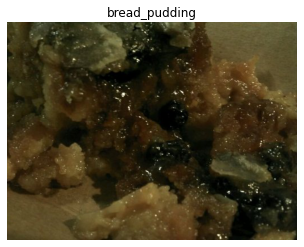

In [36]:
# View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="bread_pudding")

Image shape: (382, 512, 3)


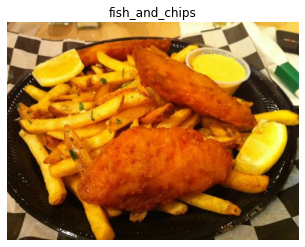

In [37]:
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="fish_and_chips")

Image shape: (512, 512, 3)


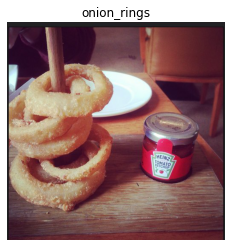

In [38]:
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="onion_rings")

In [39]:
train_datagen_norm = ImageDataGenerator(rescale = 1/255.)
test_datagen_norm = ImageDataGenerator(rescale = 1/255.)

# Setup the train and test directories
train_dir = "101_food_classes_10_percent/101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/101_food_classes_10_percent/test/"

# Import data from directories and turn it into batches
train_data_norm = train_datagen_norm.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data_norm = test_datagen_norm.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [40]:
tf.random.set_seed(42)
history_1_norm = model_1.fit(train_data_norm,epochs=10,validation_data=test_data_norm)

Epoch 1/10
24/24 [==============================] - 196s 8s/step - loss: 1.0628 - accuracy: 0.4000 - val_loss: 1.0261 - val_accuracy: 0.4533
Epoch 2/10
24/24 [==============================] - 168s 7s/step - loss: 0.9250 - accuracy: 0.5587 - val_loss: 0.9840 - val_accuracy: 0.5511
Epoch 3/10
24/24 [==============================] - 193s 8s/step - loss: 0.8274 - accuracy: 0.6333 - val_loss: 0.9729 - val_accuracy: 0.5333
Epoch 4/10
24/24 [==============================] - 170s 7s/step - loss: 0.6984 - accuracy: 0.7320 - val_loss: 1.0592 - val_accuracy: 0.5111
Epoch 5/10
24/24 [==============================] - 188s 8s/step - loss: 0.5851 - accuracy: 0.7720 - val_loss: 1.1516 - val_accuracy: 0.4933
Epoch 6/10
24/24 [==============================] - 196s 8s/step - loss: 0.4553 - accuracy: 0.8400 - val_loss: 1.2989 - val_accuracy: 0.5022
Epoch 7/10
24/24 [==============================] - 178s 7s/step - loss: 0.2448 - accuracy: 0.9160 - val_loss: 1.4363 - val_accuracy: 0.5200
Epoch 8/10
24

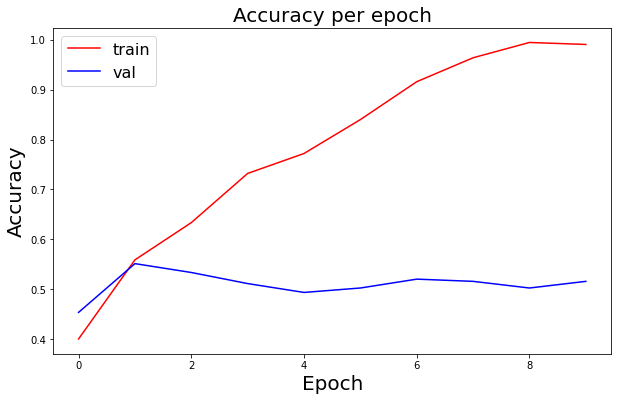

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_norm.history['accuracy'], 'r', label='train')
ax.plot(history_1_norm.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [43]:
y_prob = model_1.predict(test_data_norm)
y_hat = y_prob.argmax(axis=1)
y_hat 

array([1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 1], dtype=int64)

In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

In [57]:
true_y = []
for batch in range(len(test_data_norm)):
    true_y += list(test_data_norm[batch][-1].argmax(axis=1))

In [58]:
pred = model_1.predict(test_data_norm).argmax(axis=1)
conf_matrix=metrics.confusion_matrix(true_y,pred)    
conf_matrix = pd.DataFrame(confusion_matrix(y_pred=pred, y_true=true_y), 
index=class_names, columns=class_names)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
                bread_pudding  fish_and_chips  onion_rings
bread_pudding              47              10           18
fish_and_chips             15              30           30
onion_rings                10              26           39
